In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
"""
20.78micro-s per vec-dot vs 412micro-s per mat-dot (20x) 60x60

69 micro-s per vec-dot vs 1022 micro-s per mat-dot (14x) 100x100

328 micro-s per vec-dot vs 4946 micro-s per mat-dot (15x) 250x250

455 micro-s per vec-dot vs 7428 micro-s per mat-dot (16x) 300x300

811 micro-s per vec-dot vs 13 562 micro-s per mat-dot (16x) 400x400

"""

In [15]:
vectime_fit

array([4.85008861e-03, 6.68614327e-02, 5.58998261e+00])

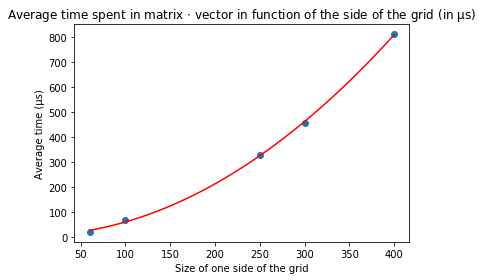

In [40]:
ns = np.array([60, 100, 250, 300, 400])
vectime = np.array([20.78, 69, 328, 455, 811])
mattime = np.array([412, 1022, 4946, 7428, 13562])
vectime_fit = np.poly1d(np.polyfit(ns, vectime, 2))
mattime_fit = np.poly1d(np.polyfit(ns, mattime, 2))

plt.title("Average time spent in matrix $\cdot$ vector in function of the side of the grid (in μs)")
plt.xlabel("Size of one side of the grid")
plt.ylabel("Average time (μs)")
plt.scatter(ns, vectime)
plt.plot(np.linspace(ns[0], ns[-1], 100), [vectime_fit(x) for x in np.linspace(ns[0], ns[-1], 100)], color='r')

In [41]:
# Extrapolate average time per matrix x vector for 1500 grid
vectime_fit(1500)

11018.581510559017

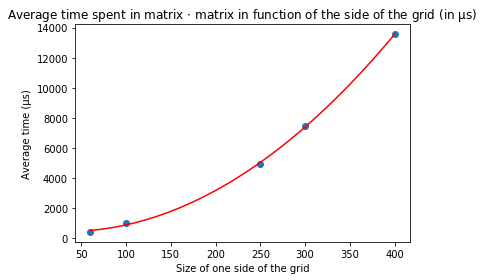

In [39]:
plt.title("Average time spent in matrix $\cdot$ matrix in function of the side of the grid (in μs)")
plt.xlabel("Size of one side of the grid")
plt.ylabel("Average time (μs)")
plt.scatter(ns, mattime)
plt.plot(np.linspace(ns[0], ns[-1], 100), [mattime_fit(x) for x in np.linspace(ns[0], ns[-1], 100)], color='r')

In [42]:
# Extrapolate average time per matrix x matrix for 1500 grid
mattime_fit(1500)

209253.4886757767

In [9]:
import numpy as np
from scipy import sparse
from scipy.sparse import linalg


In [11]:
C = np.zeros(B.shape)
ptr = 0
for i in range(1, A.shape[0]+1):
    sum = 0
    number_in_row = sparse_A.indptr[i] - sparse_A.indptr[i-1]
    eles = sparse_A.indices[ptr:ptr+number_in_row]
    ptr += number_in_row
    for _, ele in enumerate(eles):
        sum += sparse_A.data[sparse_A.indptr[i-1]+_]*B[ele]
    C[i-1] = sum

array([141., 168., 208., 248., 231., 148., 114., 156., 198., 194.])

In [45]:
n = 1024
A = np.random.randint(0,9, (n,n))
A = sparse.csr_matrix(A)
B = np.random.randint(0,9, (n,))

In [46]:
A = sparse.csr_matrix(A)

In [138]:
! export NUMBA_ENABLE_CUDASIM=1
from __future__ import division
import numpy
import math

import numpy as np
from numba import cuda

a_ind = cuda.to_device(A.indices)
a_data = cuda.to_device(A.data)
a_indptr = cuda.to_device(A.indptr)
a_len = cuda.to_device(len(A))
B = cuda.to_device(B)

res = cuda.device_array(B.shape)

@jit(nopython = True)
def mat_vec_dot(a_ind, a_data,  a_indptr, a_len, B):
    ptr = 0
    for i in range(1, a_len+1):
        sum = 0
        number_in_row = a_indptr[i] - a_indptr[i-1]
        eles = a_ind[ptr:ptr+number_in_row]
        ptr += number_in_row
        for _, ele in enumerate(eles):
            sum += a_data[a_indptr[i-1]+_]*B[ele]
        res[i-1] = sum
    return res
threadsperblock = (32, 32)
blockspergrid_x = int(math.ceil(A.shape[0] / threadsperblock[0]))
blockspergrid_y = int(math.ceil(B.shape[0] / threadsperblock[1]))
blockspergrid = (blockspergrid_x, blockspergrid_y)


mat_vec_dot[blockspergrid, threadsperblock](a_ind, a_data, a_indptr, a_len, B)


res_host = res.copy_to_host()

CudaSupportError: Error at driver init: 

Possible CUDA driver libraries are found but error occurred during load:
dlopen(libcuda.dylib, 6): image not found
dlopen(/usr/local/cuda/lib/libcuda.dylib, 6): Library not loaded: @rpath/CUDA.framework/Versions/A/CUDA
  Referenced from: /usr/local/cuda/lib/libcuda.dylib
  Reason: image not found
:

In [126]:
start = time()
res = np.zeros(B.shape)
mat_vec_dot(A.indices, A.data, A.indptr, A.shape[0], B, res)
print(time()-start)

CudaSupportError: Error at driver init: 

Possible CUDA driver libraries are found but error occurred during load:
dlopen(libcuda.dylib, 6): image not found
dlopen(/usr/local/cuda/lib/libcuda.dylib, 6): Library not loaded: @rpath/CUDA.framework/Versions/A/CUDA
  Referenced from: /usr/local/cuda/lib/libcuda.dylib
  Reason: image not found
:

In [112]:
start = time()
A.dot(B)
print(time()-start)

0.0009641647338867188


In [113]:
[0]*B.shape[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [102]:
B.shape[0]

1024

In [133]:
array(range(1, A.shape[0]+1))

NameError: name 'array' is not defined

In [1]:
from __future__ import division
import numpy
import math
from scipy import sparse
import numpy as np
from numba import cuda
from time import time

n = 1024
A = np.random.randint(0,9, (n,n))
A = sparse.csr_matrix(A)
B = np.random.randint(0,9, (n,))

a_ind = cuda.to_device(A.indices)
a_data = cuda.to_device(A.data)
a_indptr = cuda.to_device(A.indptr)
a_len = cuda.to_device(A.shape[0])
B = cuda.to_device(B)
shape = B.shape
res = cuda.device_array(shape)

@cuda.jit('void(f4[:], f4[:], f4[:], f4, f4[:], f4[:])')
def mat_vec_dot(a_ind, a_data,  a_indptr, a_len, B, res):
    ptr = 0
    sA_data = cuda.shared.array(shape=(a_len), dtype=float32)
    sB = cuda.shared.array(shape=(a_len), dtype=float32)
    sA_indices = cuda.shared.array(shape=(a_len), dtype=float32)
    sA_indptr = cuda.shared.array(shape=(a_len), dtype=float32)
    
    x = cuda.grid(1)
    tx = cuda.threadIdx.x

    if x >= res.shape[0]:
        # Quit if (x) is outside of valid res boundary
        return

    for i in range(1, a_len+1):
        sum = 0
        number_in_row = a_indptr[i] - a_indptr[i-1]
        eles = a_ind[ptr:ptr+number_in_row]
        ptr += number_in_row

        sA_data[tx] = a_data[x, ty + i * TPB]


        cuda.syncthreads()
        for _, ele in enumerate(eles):
            sum += sA_data[sA_indptr[i-1]+_]*sB[ele]
        res[i-1] = sum
threadsperblock = (32, 32)
blockspergrid_x = int(math.ceil(A.shape[0] / threadsperblock[0]))
blockspergrid_y = int(math.ceil(B.shape[0] / threadsperblock[1]))
blockspergrid = (blockspergrid_x, blockspergrid_y)

CudaSupportError: Error at driver init: 

Possible CUDA driver libraries are found but error occurred during load:
dlopen(libcuda.dylib, 6): image not found
dlopen(/usr/local/cuda/lib/libcuda.dylib, 6): Library not loaded: @rpath/CUDA.framework/Versions/A/CUDA
  Referenced from: /usr/local/cuda/lib/libcuda.dylib
  Reason: image not found
:

In [2]:
from __future__ import division
import numpy
import math
from scipy import sparse
import numpy as np
from numba import cuda
from time import time

n = 1024
A = np.random.randint(0,9, (n,n))
A = sparse.csr_matrix(A)
B = np.random.randint(0,9, (n,))

a_ind = cuda.to_device(A.indices)
a_data = cuda.to_device(A.data)
a_indptr = cuda.to_device(A.indptr)
a_len = cuda.to_device(A.shape[0])
B = cuda.to_device(B)
shape = B.shape
res = cuda.device_array(shape)

TPB = 16
@cuda.jit
def mat_vec_dot(a_ind, a_data,  a_indptr, a_len, B, res):
    ptr = 0
    i = cuda.grid(1)
    tx = cuda.threadIdx.x

    sA = cuda.shared.array(shape=(TPB), dtype=float32)
    sB = cuda.shared.array(shape=(TPB), dtype=float32)
    sA_indices = cuda.shared.array(shape=(TPB), dtype=float32)

    if x >= res.shape[0]:
        # Quit if (x, y) is outside of valid C boundary
        return

    for i in range(1, int(a_len+1/a_len/TPB)):
        sum = 0
        number_in_row = a_indptr[i] - a_indptr[i-1]
        eles = a_ind[ptr:ptr+number_in_row]
        ptr += number_in_row
        sA[ti] = a_data[ti+i*TPB]
        sA[ti] = B[ti+i*TPB]

        for j in range(len(eles)):
            sum += sA[a_indptr[i-1]+j]*sB[eles[j]]
        res[x-1] = sum

threadsperblock = (32, 32)
blockspergrid_x = int(math.ceil(A.shape[0] / threadsperblock[0]))
blockspergrid_y = int(math.ceil(B.shape[0] / threadsperblock[1]))
blockspergrid = (blockspergrid_x, blockspergrid_y)

CudaSupportError: Error at driver init: 

Possible CUDA driver libraries are found but error occurred during load:
dlopen(libcuda.dylib, 6): image not found
dlopen(/usr/local/cuda/lib/libcuda.dylib, 6): Library not loaded: @rpath/CUDA.framework/Versions/A/CUDA
  Referenced from: /usr/local/cuda/lib/libcuda.dylib
  Reason: image not found
:

In [ ]:
 from __future__ import division
import numpy
import math
from scipy import sparse
import numpy as np
from numba import cuda, float32
from time import time

n = 1024
A = np.random.randint(0,9, (n,n))
A = sparse.csr_matrix(A)
B = np.random.randint(0,9, (n,))

a_ind = cuda.to_device(A.indices)
a_data = cuda.to_device(A.data)
a_indptr = cuda.to_device(A.indptr)
a_len = cuda.to_device(A.shape[0])
B = cuda.to_device(B)
shape = B.shape
res = cuda.device_array(shape)

TPB = 16
@cuda.jit
def mat_vec_dot(a_ind, a_data,  a_indptr, a_len, B, res):
    ptr = 0
    x = cuda.grid(1)
    tx = cuda.threadIdx.x

    sA = cuda.shared.array(shape=(TPB), dtype=float32)
    sB = cuda.shared.array(shape=(TPB), dtype=float32)
    sA_indices = cuda.shared.array(shape=(TPB), dtype=float32)

    if x >= res.shape[0]:
        # Quit if (x, y) is outside of valid C boundary
        return

    for i in range(1, int(a_len+1/a_len/TPB)):
        sum = 0
        number_in_row = a_indptr[i] - a_indptr[i-1]
        eles = a_ind[ptr:ptr+number_in_row]
        ptr += number_in_row
        sA[tx] = a_data[tx+i*TPB]
        sA[tx] = B[tx+i*TPB]
        cuda.syncthreads()

        for j in range(len(eles)):
            sum += sA[a_indptr[tx-1]+j]*sB[eles[j]]
        cuda.syncthreads()
        res[x-1] = sum

In [4]:
A = np.array([[3, 2, 6],
 [6, 1, 1],
 [5, 3, 8]])

In [6]:
B = [2, 1, 8]